In [2]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim
import lucem_illud

In [2]:
df = pd.read_csv('/Users/lijiazheng/Desktop/linkedin_jobs 2019.9-2019.10_cleaned.csv')

In [5]:
df1 = pd.read_csv('/Users/lijiazheng/Desktop/linkedin jobs.csv')
df2 = pd.read_csv('/Users/lijiazheng/Desktop/linkedin jobs 2023.12-2024.1 1_small.csv')

In [12]:
columns_to_keep = ['company', 'title', 'location', 'Description', 'Seniority level', 'Employment type', 'Job function', 'Industries']
df1 = df1[columns_to_keep]
df2 = df2[columns_to_keep]
df1.head()

,company,title,location,Description,Seniority level,Employment type,Job function,Industries
0,Moxie Management,Brand Marketing Assistant,"Boston, MA",We are searching for a motivated Brand Marketi...,Entry level,Full-time,Marketing and Sales,Internet Publishing
1,Later,Talent Acquisition Partner,"Boston, MA","Later + Mavrck\n\nMavrck is the all-in-one, ad...",Entry level,Full-time,Human Resources,"Technology, Information and Internet"
2,Later,Influencer Marketing Coordinator,"Boston, MA","Later + Mavrck\n\nMavrck is the all-in-one, ad...",Entry level,Full-time,Marketing and Sales,"Technology, Information and Internet"
3,ProPivotal Staffing,CNA - Multiple Shifts Available ($22- $28/hr S...,"Boston, MA",Description\n\nCNA - Multiple Shifts Available...,Entry level,Full-time,Health Care Provider,Staffing and Recruiting
4,Atlantic Group,Talent Acquisition Specialist,"Boston, MA",Responsibilities:\nConduct full-cycle recruitm...,Associate,Contract,Human Resources,Staffing and Recruiting


In [13]:
df2.head()

,company,title,location,Description,Seniority level,Employment type,Job function,Industries
0,Alabama Department of Corrections,Talent Acquisition Specialist,"Birmingham, AL",If working and growing with a good team is wha...,Entry level,Full-time,Human Resources,Government Administration
1,Huddle House,Dishwasher,"Brookwood, AL",Looking to fill multiple dishwasher positions....,Entry level,Full-time,Management and Manufacturing,Restaurants
2,Alabama State Department of Education,Elementary Teacher (K-6) 2023-2024 *IMMEDIATE ...,"Lanett, AL",Lanett City Schools is seeking applicants for ...,Entry level,Full-time,Education and Training,Education Administration Programs
3,Alabama State Department of Education,ELEMENTARY TEACHER (K-2),"Montgomery, AL",Start Date TBD\n\nDuty Days 187\n\nSalary Rang...,Entry level,Full-time,Education and Training,Education Administration Programs
4,Alabama State Department of Education,Office Assistant - School Site TBD,"Trussville, AL",See Job Description Binder or access website w...,Entry level,Full-time,Administrative,Education Administration Programs


In [14]:
df3 = pd.read_csv('/Users/lijiazheng/Desktop/evans/linkedin jobs 2023.12-2024.1.csv')
df3 = df3[columns_to_keep]
df3.shape

(14900, 8)

In [15]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(15566, 8)

In [7]:
df['post-pandemic'] = 1

In [48]:
df['Seniority level'].value_counts()

Seniority level
Entry level         7585
Mid-Senior level    4179
Not Applicable      1086
Associate            530
Director             339
Internship           235
Executive            234
Name: count, dtype: int64

In [33]:
def extract_job_info(job_description):
    if not isinstance(job_description, str):
        return 0  # Return 0 instead of 'No' for non-string inputs
    
    soup = BeautifulSoup(job_description, 'html.parser')
    text = soup.get_text(separator=' ') 
    remote_search = re.search(r'remote', text, re.IGNORECASE)
    remote = 1 if remote_search else 0

    return remote
df['Description'] = df['Description'].astype(str)
df['Remote'] = df['Description'].apply(lambda x: extract_job_info(x))

# Optionally, ensure 'Remote' is of integer type
df['Remote'] = df['Remote'].astype(int)

/var/folders/gj/c7zwmp_n0n926g9h2sj4fj3w0000gn/T/ipykernel_36645/1943646136.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(job_description, 'html.parser')


In [37]:
df['cleaned_job_description'] = df['Description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().replace('\n', ' '))
df['tokenized_sents'] = df['cleaned_job_description'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
normalized_sents = df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=True) for s in x])
df['normalized_sents'] = normalized_sents

/var/folders/gj/c7zwmp_n0n926g9h2sj4fj3w0000gn/T/ipykernel_36645/1157000471.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['cleaned_job_description'] = df['Description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().replace('\n', ' '))
/Users/lijiazheng/Library/Python/3.9/lib/python/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [24]:
columns_to_keep = ['title', 'location', 'Seniority level', 'Industries', 'post-pandemic', 'Remote','cleaned_job_description','tokenized_sents','normalized_sents']
df = df[columns_to_keep]

In [25]:
df.rename(columns={'title': 'Job Title'}, inplace=True)
df.head()

,Job Title,location,Seniority level,Industries,post-pandemic,Remote,cleaned_job_description,tokenized_sents,normalized_sents
0,Brand Marketing Assistant,"Boston, MA",Entry level,Internet Publishing,1,0,We are searching for a motivated Brand Marketi...,"[['We', 'are', 'searching', 'for', 'a', 'motiv...","[['searching', 'motivated', 'brand', 'marketin..."
1,Talent Acquisition Partner,"Boston, MA",Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[['later', '+', 'mavrck', 'mavrck', 'advanced'..."
2,Influencer Marketing Coordinator,"Boston, MA",Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[['later', '+', 'mavrck', 'mavrck', 'advanced'..."
3,CNA - Multiple Shifts Available ($22- $28/hr S...,"Boston, MA",Entry level,Staffing and Recruiting,1,0,Description CNA - Multiple Shifts Available (...,"[['Description', 'CNA', 'Multiple', 'Shifts', ...","[['description', 'cna', 'multiple', 'shifts', ..."
4,Talent Acquisition Specialist,"Boston, MA",Associate,Staffing and Recruiting,1,0,Responsibilities: Conduct full-cycle recruitme...,"[['Responsibilities', 'Conduct', 'full', 'cycl...","[['responsibilities', 'conduct', 'cycle', 'rec..."


In [137]:
df[['City', 'State']] = df['location'].str.split(', ', expand=True)

Label the seniority level for each job in df2019

In [196]:
df = pd.read_csv('/Users/lijiazheng/Desktop/2024.csv')
df2019 = pd.read_csv('/Users/lijiazheng/Desktop/2019.csv')

In [201]:
import ast

def convert_string_to_list(data):
    if isinstance(data, str):
        try:
            return ast.literal_eval(data)
        except Exception as e:
            # Handle or log the exception as needed
            return None  # or some default value, e.g., [], depending on your requirements
    return data

df['normalized_sents'] = df['normalized_sents'].apply(convert_string_to_list)
df2019['normalized_sents'] = df2019['normalized_sents'].apply(convert_string_to_list)


In [203]:
def normalize_data(entry):
    if isinstance(entry, list):
        return entry  # Already in the desired format
    else:
        # Handle floats and NoneTypes by converting them to an empty list or a placeholder
        return []

# Apply the normalization function to df2019['normalized_sents']
df2019['normalized_sents'] = df2019['normalized_sents'].apply(normalize_data)

In [204]:
types_in_normalized_sents = set(df['normalized_sents'].apply(type))
types_in_normalized_sents_2019 = set(df2019['normalized_sents'].apply(type))

print("Data types in df['normalized_sents']:", types_in_normalized_sents)
print("Data types in df2019['normalized_sents']:", types_in_normalized_sents_2019)

Data types in df['normalized_sents']: {<class 'list'>}
Data types in df2019['normalized_sents']: {<class 'list'>}


In [205]:
def join_sentences(list_of_lists):
    if isinstance(list_of_lists, list):
        return ' '.join([' '.join(sentence) for sentence in list_of_lists if isinstance(sentence, list)])
    return ''  # Handle non-list data as empty strings

df['normalized_sents_str'] = df['normalized_sents'].apply(join_sentences)
df2019['normalized_sents_str'] = df2019['normalized_sents'].apply(join_sentences)


In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X_train = tfidf.fit_transform(df['normalized_sents_str']).toarray()
X_2019 = tfidf.transform(df2019['normalized_sents_str']).toarray()

In [209]:
from sklearn.linear_model import LogisticRegression

y_train = df['Seniority level']
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [210]:
y_pred_2019 = model.predict(X_2019)
y_pred_2019

array(['Entry level', 'Not Applicable', 'Entry level', ...,
       'Mid-Senior level', 'Entry level', 'Entry level'], dtype=object)

In [211]:
df2019['Seniority Level'] = y_pred_2019

In [217]:
df2019 = df2019.drop('Unnamed: 0', axis=1)

In [215]:
df = concatenated_df = pd.concat([df, df2019], ignore_index=True)

In [222]:
df['Seniority level'] = df['Seniority level'].combine_first(df['Seniority Level'])
df = df.drop('Seniority Level', axis=1)

In [223]:
columns = ['Job Title',	'Seniority level','Industries','post-pandemic','Remote','cleaned_job_description','tokenized_sents','normalized_sents','City','State','normalized_sents_str']
df = df[columns]
df

,Job Title,Seniority level,Industries,post-pandemic,Remote,cleaned_job_description,tokenized_sents,normalized_sents,City,State,normalized_sents_str
0,Brand Marketing Assistant,Entry level,Internet Publishing,1,0,We are searching for a motivated Brand Marketi...,"[['We', 'are', 'searching', 'for', 'a', 'motiv...","[[searching, motivated, brand, marketing, assi...",Boston,MA,searching motivated brand marketing assistant ...
1,Talent Acquisition Partner,Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[[later, +, mavrck, mavrck, advanced, influenc...",Boston,MA,later + mavrck mavrck advanced influencer mark...
2,Influencer Marketing Coordinator,Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[[later, +, mavrck, mavrck, advanced, influenc...",Boston,MA,later + mavrck mavrck advanced influencer mark...
3,CNA - Multiple Shifts Available ($22- $28/hr S...,Entry level,Staffing and Recruiting,1,0,Description CNA - Multiple Shifts Available (...,"[['Description', 'CNA', 'Multiple', 'Shifts', ...","[[description, cna, multiple, shifts, availabl...",Boston,MA,description cna multiple shifts available $ 22...
4,Talent Acquisition Specialist,Associate,Staffing and Recruiting,1,0,Responsibilities: Conduct full-cycle recruitme...,"[['Responsibilities', 'Conduct', 'full', 'cycl...","[[responsibilities, conduct, cycle, recruitmen...",Boston,MA,responsibilities conduct cycle recruitment pro...
...,...,...,...,...,...,...,...,...,...,...,...
30274,Senior Tax Accountant,Mid-Senior level,Business Management Consulting Services,0,0,Position: Senior Tax Accountant Description:...,"[['Position', 'Senior', 'Tax', 'Accountant', '...","[[position, senior, tax, accountant, descripti...",Washington,DC,position senior tax accountant description lar...
30275,Field Service Technician I (PHX),Entry level,Security and Surveillance Equipment Manufacturing,0,0,"As a level one Field Service Technician, t...","[['As', 'a', 'level', 'one', 'Field', 'Service...","[[level, field, service, technician, individua...",Phoenix,AZ,level field service technician individual team...
30276,Subsidiary PMM | Compliance Product Marketing ...,Mid-Senior level,Information technology and software services,0,0,Our opportunity The workplace is transformi...,"[['Our', 'opportunity', 'The', 'workplace', 'i...","[[opportunity, workplace, transforming, changi...",Bellevue,WA,opportunity workplace transforming changing em...
30277,"Senior Sales Executive, New York",Entry level,International Shipping and Logistics Services,0,0,Easyship has innovated the global shipping la...,"[['Easyship', 'has', 'innovated', 'the', 'glob...","[[easyship, innovated, global, shipping, lands...",New York,NY,easyship innovated global shipping landscape s...


In [224]:
df.to_csv('/Users/lijiazheng/Desktop/linkedin jobs.csv')

In [2]:
df = pd.read_csv('/Users/lijiazheng/Desktop/linkedin jobs.csv')

/var/folders/gj/c7zwmp_n0n926g9h2sj4fj3w0000gn/T/ipykernel_32787/864486632.py:1: DtypeWarning: Columns (0,4,5,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/lijiazheng/Desktop/linkedin jobs.csv')


In [3]:
df = df.dropna(subset=['normalized_sents'])
df

,Unnamed: 0,Job Title,Seniority level,Industries,post-pandemic,Remote,cleaned_job_description,tokenized_sents,normalized_sents,City,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,0,Brand Marketing Assistant,Entry level,Internet Publishing,1,0,We are searching for a motivated Brand Marketi...,"[['We', 'are', 'searching', 'for', 'a', 'motiv...","[['searching', 'motivated', 'brand', 'marketin...",Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Talent Acquisition Partner,Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[['later', '+', 'mavrck', 'mavrck', 'advanced'...",Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Influencer Marketing Coordinator,Entry level,"Technology, Information and Internet",1,0,"Later + Mavrck Mavrck is the all-in-one, adva...","[['Later', '+', 'Mavrck', 'Mavrck', 'is', 'the...","[['later', '+', 'mavrck', 'mavrck', 'advanced'...",Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CNA - Multiple Shifts Available ($22- $28/hr S...,Entry level,Staffing and Recruiting,1,0,Description CNA - Multiple Shifts Available (...,"[['Description', 'CNA', 'Multiple', 'Shifts', ...","[['description', 'cna', 'multiple', 'shifts', ...",Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Talent Acquisition Specialist,Associate,Staffing and Recruiting,1,0,Responsibilities: Conduct full-cycle recruitme...,"[['Responsibilities', 'Conduct', 'full', 'cycl...","[['responsibilities', 'conduct', 'cycle', 'rec...",Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30275,30278,Senior Tax Accountant,Mid-Senior level,Business Management Consulting Services,0,0,Position: Senior Tax Accountant Description:...,"[['Position', 'Senior', 'Tax', 'Accountant', '...","[['position', 'senior', 'tax', 'accountant', '...",Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30276,30279,Field Service Technician I (PHX),Entry level,Security and Surveillance Equipment Manufacturing,0,0,"As a level one Field Service Technician, t...","[['As', 'a', 'level', 'one', 'Field', 'Service...","[['level', 'field', 'service', 'technician', '...",Phoenix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30277,30280,Subsidiary PMM | Compliance Product Marketing ...,Mid-Senior level,Information technology and software services,0,0,Our opportunity The workplace is transformi...,"[['Our', 'opportunity', 'The', 'workplace', 'i...","[['opportunity', 'workplace', 'transforming', ...",Bellevue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30278,30281,"Senior Sales Executive, New York",Entry level,International Shipping and Logistics Services,0,0,Easyship has innovated the global shipping la...,"[['Easyship', 'has', 'innovated', 'the', 'glob...","[['easyship', 'innovated', 'global', 'shipping...",New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
non_empty_lists = df['tokenized_sents'].apply(lambda x: isinstance(x, list) and len(x) > 0)
print(f"Contains non-empty lists: {non_empty_lists.any()}")

Contains non-empty lists: False


In [22]:
jobsW2V_skipgram = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum(), sg=1, vector_size=300, window=10, min_count=3, epochs=10)
jobsW2V_skipgram.save('/Users/lijiazheng/Desktop/wangzhao winter/jobsW2V_skipgram.model')

In [4]:
from gensim.models import Word2Vec

model_path = '/Users/lijiazheng/Desktop/wangzhao winter/jobsW2V_skipgram.model'
jobsW2V_skipgram = Word2Vec.load(model_path)

In [5]:
jobsW2V_skipgram.wv.most_similar('java')

[('scala', 0.7472053170204163),
 ('javascript', 0.7340088486671448),
 ('python', 0.7216954827308655),
 ('j2ee', 0.7178977131843567),
 ('c++', 0.704766035079956),
 ('ruby', 0.7009792923927307),
 ('nodejs', 0.6988011598587036),
 ('.net', 0.6981260776519775),
 ('servlets', 0.6819117665290833),
 ('perl', 0.6809719800949097)]

In [25]:
from sklearn.decomposition import PCA

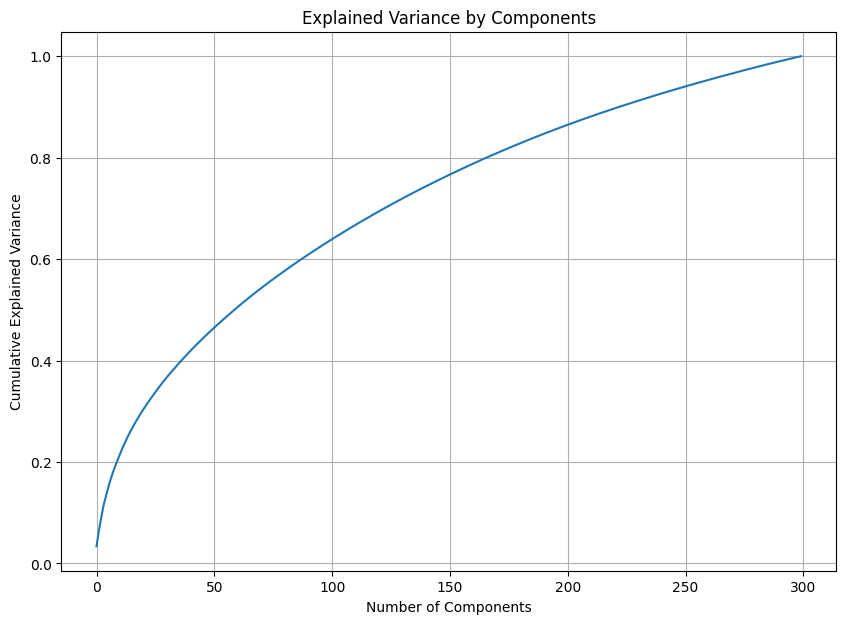

In [26]:
word_vectors = jobsW2V_skipgram.wv
words = list(word_vectors.key_to_index.keys())
word_embeddings = np.array([word_vectors[word] for word in words])
pca = PCA().fit(word_embeddings)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In [27]:
n_components = 100

pca_reduced = PCA(n_components=n_components)
word_vectors = pca_reduced.fit_transform(word_embeddings)

/Users/lijiazheng/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


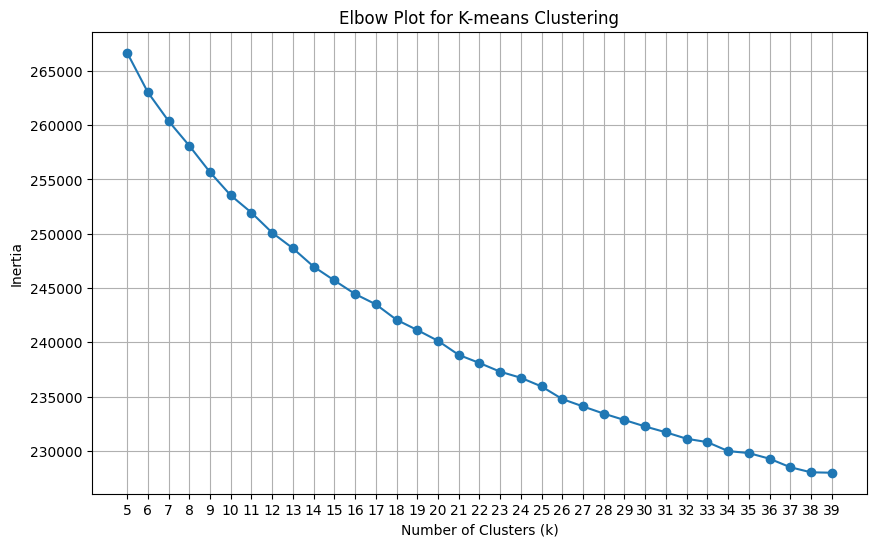

In [28]:
k_values = range(5, 40)  # For example, from 1 to 25

# List to hold the inertia (sum of squared distances to closest cluster center)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(word_vectors)
    inertias.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, '-o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Silhouette Score for k=5: 0.03710325062274933
Silhouette Score for k=6: 0.03284230828285217
Silhouette Score for k=7: 0.01632390357553959
Silhouette Score for k=8: 0.012945749796926975
Silhouette Score for k=9: 0.017032742500305176
Silhouette Score for k=10: 0.011929979547858238
Silhouette Score for k=11: 0.01279497891664505
Silhouette Score for k=12: 0.01166043896228075
Silhouette Score for k=13: 0.0020219036377966404
Silhouette Score for k=14: 0.013971442356705666
Silhouette Score for k=15: 0.005689490586519241
Silhouette Score for k=16: 0.003021214623004198
Silhouette Score for k=17: 0.001302188728004694
Silhouette Score for k=18: -0.05485207587480545
Silhouette Score for k=19: -0.05938045680522919
Silhouette Score for k=20: -0.05907746031880379
Silhouette Score for k=21: -0.05788424611091614
Silhouette Score for k=22: -0.058101292699575424
Silhouette Score for k=23: -0.05773269012570381
Silhouette Score for k=24: -0.05836833268404007
Silhouette Score for k=25: -0.05788467824459076


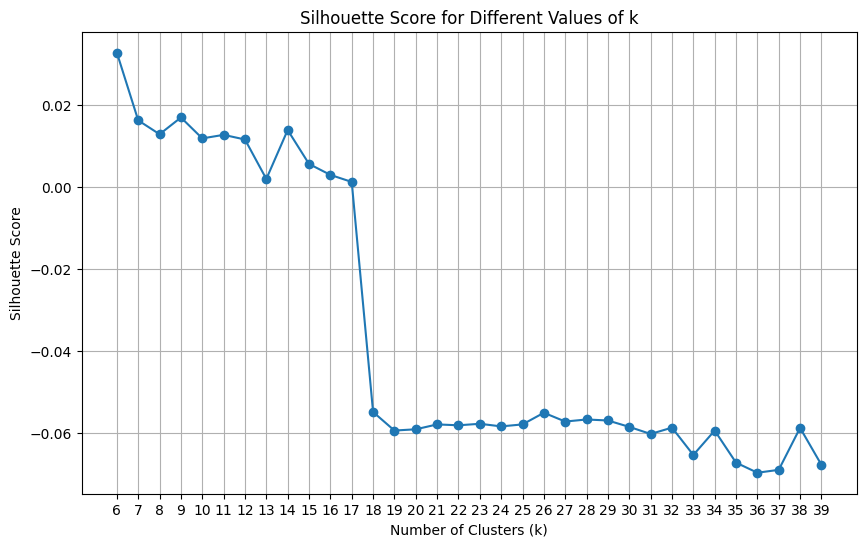

In [29]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:  # Reusing k_values from the elbow method example
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(word_vectors)
    labels = kmeans.labels_
    # Compute the silhouette score only if k is greater than 1
    if k > 1:
        silhouette_avg = silhouette_score(word_vectors, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score for k={k}: {silhouette_avg}")
    else:
        silhouette_scores.append(None)  # Silhouette score is not defined for k=1

# Plotting silhouette scores over k
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores[1:], '-o')  # Adjusted to skip the first value which is None for k=1
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])  # Adjusted to skip k=1
plt.grid(True)
plt.show()


In [6]:
word_vectors = jobsW2V_skipgram.wv.vectors
words = list(jobsW2V_skipgram.wv.index_to_key)
k = 17
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(word_vectors)
word_cluster_labels = kmeans.labels_
clusters = {}
for word, cluster in zip(words, word_cluster_labels):
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(word)
for cluster in range(k):
    print(f"Cluster {cluster}: {clusters[cluster]}")

Cluster 0: ['store', 'events', 'home', 'food', 'guests', 'live', 'guest', 'restaurant', 'room', 'house', 'hospitality', 'hotel', 'sports', 'art', 'fitness', 'stores', 'amazing', 'entertainment', 'happy', 'shop', 'beauty', 'park', 'premium', 'kitchen', 'studio', 'fashion', 'club', 'beverage', 'restaurants', 'fresh', 'destinations', 'dining', 'adventure', 'old', 'bar', 'station', 'table', 'game', 'shopping', 'tv', 'casual', 'hotels', 'prep', 'lifestyle', 'seasonal', 'music', 'dress', 'coffee', 'crew', 'snacks', 'meals', 'parks', 'star', 'break', 'stocked', 'outdoor', 'theme', 'menu', 'neighborhood', 'gift', 'original', 'beautiful', 'meal', 'memorable', 'lobby', 'luxury', 'awesome', 'walks', 'fine', 'host', 'pool', 'destination', 'grocery', 'exclusive', 'catering', 'television', 'ingredients', 'ambassador', 'games', 'trips', 'friends', 'culinary', 'tours', 'beverages', 'season', 'convenient', 'farm', 'plenty', 'cook', 'venues', 'square', 'fans', 'kids', 'chef', 'spa', 'venue', 'organic', 

In [7]:
word_of_interest = 'python'

word_index = jobsW2V_skipgram.wv.key_to_index[word_of_interest]
cluster_number = kmeans.labels_[word_index]

skills = []
for word, cluster in zip(words, word_cluster_labels):
    if cluster == cluster_number:
        skills.append(word)

In [36]:
print(len(skills))

1617


In [44]:
skills[1000:]

['c#/.net',
 'kibana',
 'recon',
 'ssms',
 'landesk',
 'cordova',
 'tenancy',
 'sail',
 'ekahau',
 'rcsa',
 '•minimum',
 'autopilot',
 'gulp',
 'aster',
 'experion',
 'telepresence',
 'swarm',
 'neptune',
 'sagemaker',
 'xhtml',
 '10.x',
 'sizmek',
 'automator',
 'dialogflow',
 'risc',
 'mesosphere',
 'kore.ai',
 'jahia',
 'r&s',
 'mxnet',
 'datawarehouse',
 'sast',
 'orchestrator',
 'deception',
 'nifi',
 'rip',
 '802.1q',
 'hmc',
 'opc',
 'dmz',
 'fccs',
 'oauth2',
 'token',
 'tokenization',
 'java/.net',
 'guidewire',
 'ootb',
 'uc&c',
 'testng',
 'rds)/aurora',
 'mercurial',
 'wpa2',
 'ccda',
 'odata',
 'powerpivot',
 'dast',
 'qualys',
 'secops',
 'styled',
 'techstack',
 'baw',
 'msce',
 'codecs',
 'sdwan',
 'vdc',
 'saltstack',
 'jpa',
 'riversand',
 'pcds',
 'jamf',
 'odi',
 'springboot',
 'amx',
 'nortel',
 'obiee',
 'triggering',
 'acmp',
 'vxlan',
 'cifs',
 'nix',
 'dockers',
 'beacons',
 'mirroring',
 'jbpm',
 'xdr',
 'highjump',
 'clustered',
 'rancher',
 'referential',
 '

In [45]:
skills = [
'gigya', 'parquet', 'servicecloud', 'ejb', 'quickbase', 'rhce', 'jsf', 'isc2', 'autoscaling', 'vagrant', 'hds', 'esx', 'gcih', 'cwdm', 'openview', 'vra', 'julia', 'memcached', 'java/', 'appium', 'factorytalk', 'xsd', 'haproxy', 'lucene', 'graphite', 'hsrp', '802.11a', 'ngfw', 'firebase', 'aws/', 'sosl', 'acropolis', 'eai', 'ccvp', 'opencl', 'cloudtrail', 'clojure', 'jcl', 'teamcenter', 'next.js', 'profisee', 'novell', 'firepower', 'rtos', 'gwt', 'murex', 'xcode', 'jupyter', 'sungard', 'dmvpn', 'wintel', 'aris', 'idocs', 'jncip', 'encase', 'clearpass', 'sysadmin', 'vbscript', 'i2c', 'as2', 'vxrail', 'gcia', 'c++/c', 'awt', 'geoverse', 'ueba', 'airwatch', 'acsp', 'thingworx', 'xenapp', 'ccea', 'vsts', 'lambdas', 'ado', 'bayes', 'sqlserver', 'metasploit', 'neo4j', 'logstash', 'symfony', 'aiml', 'skylark', 'xsl', 'cdns', 'otv', 'gcfa', 'raml', 'twistlock', 'qtp', 'mipi', 'vmotion', 'rhcsa', 'uem', 'mvvm', 'pubsub', 'circleci', 'ksh', 'hdi', 'fastapi', 'peopletools', 'applocker', 'wdac', 'win10', 'msmq', 'atg', 'mern', 'burp', 'datalake', 'svm', 'kali', 'lsmw', 'brocade', 'bac', 'fidessa', '5gnr', 'salescloud', 'ui5', 'ironport', 'tivoli', 'python3', 'solace', 'influxdb', 'zabbix', 'ble', 'celery', 'vcloud', 'rxjs', 'c#.net', 'alcatel', 'mariadb', 'wdm', 'jax', 'nvme', 'pm2', 'xaas', 'fhir', 'mocha', 'j2ee/', 'zap', 'dtcc', 'sddc', 'soapui', 'softlayer', 'udb', 'vrrp', 'e1', 'vtp', 'glbp', 'curl', 'struts', 'vrealize', 'opencv', 'ambari', 'aks', 'jest', 'prpc', 'wsdl', 'lstm', 'apic', 'xenserver', 'emm', 'wpa', 'ovm', 'vsan', 'rpg', 'loadrunner', 'uccx', 'tcpdump', 'silverlight', 'linq', 'vsl', 'rman', 'rxjava']
for skill in skills:
    print(skill)

gigya
parquet
servicecloud
ejb
quickbase
rhce
jsf
isc2
autoscaling
vagrant
hds
esx
gcih
cwdm
openview
vra
julia
memcached
java/
appium
factorytalk
xsd
haproxy
lucene
graphite
hsrp
802.11a
ngfw
firebase
aws/
sosl
acropolis
eai
ccvp
opencl
cloudtrail
clojure
jcl
teamcenter
next.js
profisee
novell
firepower
rtos
gwt
murex
xcode
jupyter
sungard
dmvpn
wintel
aris
idocs
jncip
encase
clearpass
sysadmin
vbscript
i2c
as2
vxrail
gcia
c++/c
awt
geoverse
ueba
airwatch
acsp
thingworx
xenapp
ccea
vsts
lambdas
ado
bayes
sqlserver
metasploit
neo4j
logstash
symfony
aiml
skylark
xsl
cdns
otv
gcfa
raml
twistlock
qtp
mipi
vmotion
rhcsa
uem
mvvm
pubsub
circleci
ksh
hdi
fastapi
peopletools
applocker
wdac
win10
msmq
atg
mern
burp
datalake
svm
kali
lsmw
brocade
bac
fidessa
5gnr
salescloud
ui5
ironport
tivoli
python3
solace
influxdb
zabbix
ble
celery
vcloud
rxjs
c#.net
alcatel
mariadb
wdm
jax
nvme
pm2
xaas
fhir
mocha
j2ee/
zap
dtcc
sddc
soapui
softlayer
udb
vrrp
e1
vtp
glbp
curl
struts
vrealize
opencv
ambari
a

In [8]:
skills = pd.read_csv('/Users/lijiazheng/Desktop/skills_new.csv',header = None)
skills

,0
0,security
1,cloud
2,network
3,architecture
4,infrastructure
...,...
660,Self-motivation
661,Curiosity
662,Accountability
663,Integrity


In [9]:
skills_list = skills[0].tolist()

In [10]:
def match_skills(description):
    if not isinstance(description, str):
        return []

    matched_skills = []
    for skill in skills_list:
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            matched_skills.append(skill)
    return matched_skills

df['skills'] = df['cleaned_job_description'].apply(match_skills)

In [11]:
df['skills']

0        [Leadership, Problem-Solving, Teamwork, Creati...
1        [network, networking, Communication, Creativit...
2        [Digital Marketing, Communication, Teamwork, O...
3                                           [Organization]
4                  [networking, Communication, Networking]
                               ...                        
30275                                   [Customer Service]
30276    [security, troubleshooting, office, word, exce...
30277    [network, distributed, threat, Communication, ...
30278                    [Communication, Customer Service]
30279    [html, office, excel, powerpoint, Graphic Desi...
Name: skills, Length: 30276, dtype: object

In [15]:
df.to_csv('/Users/lijiazheng/Desktop/linkedin jobs.csv')

Index(['Unnamed: 0', 'Job Title', 'Seniority level', 'Industries',
       'post-pandemic', 'Remote', 'cleaned_job_description', 'tokenized_sents',
       'normalized_sents', 'City', 'State', 'skills', 'Industry_Tags',
       'Industries_processed'],
      dtype='object')

In [62]:
df = df[~df['Seniority level'].str.contains(r'^\s*architecture\s*$', case=False, na=False)]
df['Seniority level'].value_counts()

Seniority level
Entry level         14396
Mid-Senior level    12893
Not Applicable       1264
Director              622
Associate             538
Executive             324
Internship            237
Name: count, dtype: int64